# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [198]:
# Use this cell for your code

import pandas as pd
df = pd.read_csv(r'C:\Users\Omistaja\Downloads\train.csv')
print("Shape of the dataset:", df.shape)

Shape of the dataset: (891, 12)


2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [199]:
# Use this cell for your code

df = pd.read_csv(r'C:\Users\Omistaja\Downloads\train.csv')
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
print(df.shape)
df.head()

(891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [200]:
# Use this cell for your code

df = pd.read_csv(r'C:\Users\Omistaja\Downloads\train.csv')
df["Deck"] = df["Cabin"].str[0]
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
print(df["Deck"].unique())
df.head()

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [201]:
# Use this cell for your code


categorical_cols = ["Sex", "Embarked", "Deck"]

for col in categorical_cols:
    df[col] = df[col].astype("category").cat.codes
    
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,2,-1
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,-1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,-1


5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [202]:
# Use this cell for your code

continuous_cols = ["Age", "Fare"]
categorical_cols = ["Sex", "Embarked", "Deck"]

for col in continuous_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isna().sum())
df.head()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,2,-1
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,-1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,-1


6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [203]:
[
  {
    "Survived": 0,
    "Pclass": 3,
    "Sex": 1,
    "Age": 22.0,
    "SibSp": 1,
    "Parch": 0,
    "Fare": 7.25,
    "Embarked": 2,
    "Deck": -1
  },
  {
    "Survived": 1,
    "Pclass": 1,
    "Sex": 0,
    "Age": 38.0,
    "SibSp": 1,
    "Parch": 0,
    "Fare": 71.2833,
    "Embarked": 0,
    "Deck": 2
  }
]

[{'Survived': 0,
  'Pclass': 3,
  'Sex': 1,
  'Age': 22.0,
  'SibSp': 1,
  'Parch': 0,
  'Fare': 7.25,
  'Embarked': 2,
  'Deck': -1},
 {'Survived': 1,
  'Pclass': 1,
  'Sex': 0,
  'Age': 38.0,
  'SibSp': 1,
  'Parch': 0,
  'Fare': 71.2833,
  'Embarked': 0,
  'Deck': 2}]

In [204]:
# Use this cell for your code

df.to_csv("titanic_processed.csv", index=False)
df.to_json("titanic_processed.json", orient="records", lines=False)

print("Files saved: titanic_processed.csv, titanic_processed.json")

Files saved: titanic_processed.csv, titanic_processed.json


Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [205]:
# Use this cell for your code

categorical_cols = ["Sex", "Embarked", "Deck", "Pclass"]
numerical_cols = ["Age", "Fare", "SibSp", "Parch", "Survived"]

print("Categorical variables (mode):")
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    print(f"{col}: {mode_val}")

print("\nNumerical variables (median):")
for col in numerical_cols:
    median_val = df[col].median()
    print(f"{col}: {median_val}")

Categorical variables (mode):
Sex: 1
Embarked: 2
Deck: -1
Pclass: 3

Numerical variables (median):
Age: 29.69911764705882
Fare: 14.4542
SibSp: 0.0
Parch: 0.0
Survived: 0.0


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [206]:
# Use this cell for your code

survivors = df[df["Survived"] == 1]
non_survivors = df[df["Survived"] == 0]
categorical_cols = ["Sex", "Embarked", "Deck", "Pclass"]
numerical_cols = ["Age", "Fare", "SibSp", "Parch"]

def average_passenger(df_subset):
    avg_passenger = {}
    for col in categorical_cols:
        avg_passenger[col] = df_subset[col].mode()[0]
    for col in numerical_cols:
        avg_passenger[col] = df_subset[col].median()
    avg_passenger["Survived"] = df_subset["Survived"].mode()[0]  # just for completeness
    return avg_passenger

avg_survivor = average_passenger(survivors)
avg_non_survivor = average_passenger(non_survivors)
print("Average Survivor:", avg_survivor)
print("Average Non-Survivor:", avg_non_survivor)

Average Survivor: {'Sex': np.int8(0), 'Embarked': np.int8(2), 'Deck': np.int8(-1), 'Pclass': np.int64(1), 'Age': np.float64(29.69911764705882), 'Fare': np.float64(26.0), 'SibSp': np.float64(0.0), 'Parch': np.float64(0.0), 'Survived': np.int64(1)}
Average Non-Survivor: {'Sex': np.int8(1), 'Embarked': np.int8(2), 'Deck': np.int8(-1), 'Pclass': np.int64(3), 'Age': np.float64(29.69911764705882), 'Fare': np.float64(10.5), 'SibSp': np.float64(0.0), 'Parch': np.float64(0.0), 'Survived': np.int64(0)}


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

In [207]:
# Use this cell for your code

import numpy as np
avg_survivor_series = pd.Series(avg_survivor)
avg_non_survivor_series = pd.Series(avg_non_survivor)

def euclidean_distance(row, prototype):
    return np.sqrt(np.sum((row - prototype) ** 2))

df["dist_to_avg_survivor"] = df.apply(lambda row: euclidean_distance(row, avg_survivor_series), axis=1)
df["dist_to_avg_non_survivor"] = df.apply(lambda row: euclidean_distance(row, avg_non_survivor_series), axis=1)
closest_survivor_idx = df[df["Survived"] == 1]["dist_to_avg_survivor"].idxmin()
closest_survivor = df.loc[closest_survivor_idx]
closest_non_survivor_idx = df[df["Survived"] == 0]["dist_to_avg_non_survivor"].idxmin()
closest_non_survivor = df.loc[closest_non_survivor_idx]

print("Closest survivor to average:", closest_survivor)
print("\nClosest non-survivor to average:", closest_non_survivor)

Closest survivor to average: Survived                     1.000000
Pclass                       1.000000
Sex                          1.000000
Age                         29.699118
SibSp                        0.000000
Parch                        0.000000
Fare                        26.550000
Embarked                     2.000000
Deck                        -1.000000
dist_to_avg_survivor         1.141271
dist_to_avg_non_survivor    16.205015
Name: 507, dtype: float64

Closest non-survivor to average: Survived                     0.000000
Pclass                       3.000000
Sex                          1.000000
Age                         29.699118
SibSp                        0.000000
Parch                        0.000000
Fare                         9.500000
Embarked                     2.000000
Deck                        -1.000000
dist_to_avg_survivor        16.680827
dist_to_avg_non_survivor     1.000000
Name: 868, dtype: float64


In [208]:
survivor_sim_other_idx = df[df["Survived"] == 1]["dist_to_avg_non_survivor"].idxmin()
survivor_sim_other = df.loc[survivor_sim_other_idx]
non_survivor_sim_other_idx = df[df["Survived"] == 0]["dist_to_avg_survivor"].idxmin()
non_survivor_sim_other = df.loc[non_survivor_sim_other_idx]
print("Survivor most similar to average non-survivor:", survivor_sim_other)
print("\nNon-survivor most similar to average survivor:", non_survivor_sim_other)

Survivor most similar to average non-survivor: Survived                     1.000000
Pclass                       3.000000
Sex                          1.000000
Age                         30.000000
SibSp                        0.000000
Parch                        0.000000
Fare                         9.500000
Embarked                     2.000000
Deck                        -1.000000
dist_to_avg_survivor        16.653544
dist_to_avg_non_survivor     1.445867
Name: 286, dtype: float64

Non-survivor most similar to average survivor: Survived                     0.000000
Pclass                       1.000000
Sex                          1.000000
Age                         29.699118
SibSp                        0.000000
Parch                        0.000000
Fare                        25.925000
Embarked                     2.000000
Deck                        -1.000000
dist_to_avg_survivor         1.416201
dist_to_avg_non_survivor    15.554119
Name: 168, dtype: float64


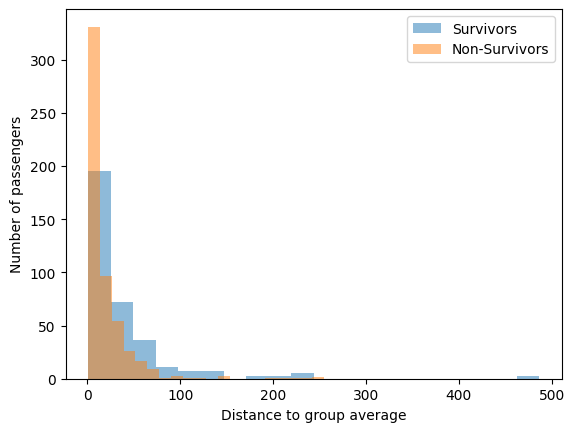

In [209]:
import matplotlib.pyplot as plt
plt.hist(df[df["Survived"]==1]["dist_to_avg_survivor"], bins=20, alpha=0.5, label="Survivors")
plt.hist(df[df["Survived"]==0]["dist_to_avg_non_survivor"], bins=20, alpha=0.5, label="Non-Survivors")
plt.xlabel("Distance to group average")
plt.ylabel("Number of passengers")
plt.legend()
plt.show()

4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

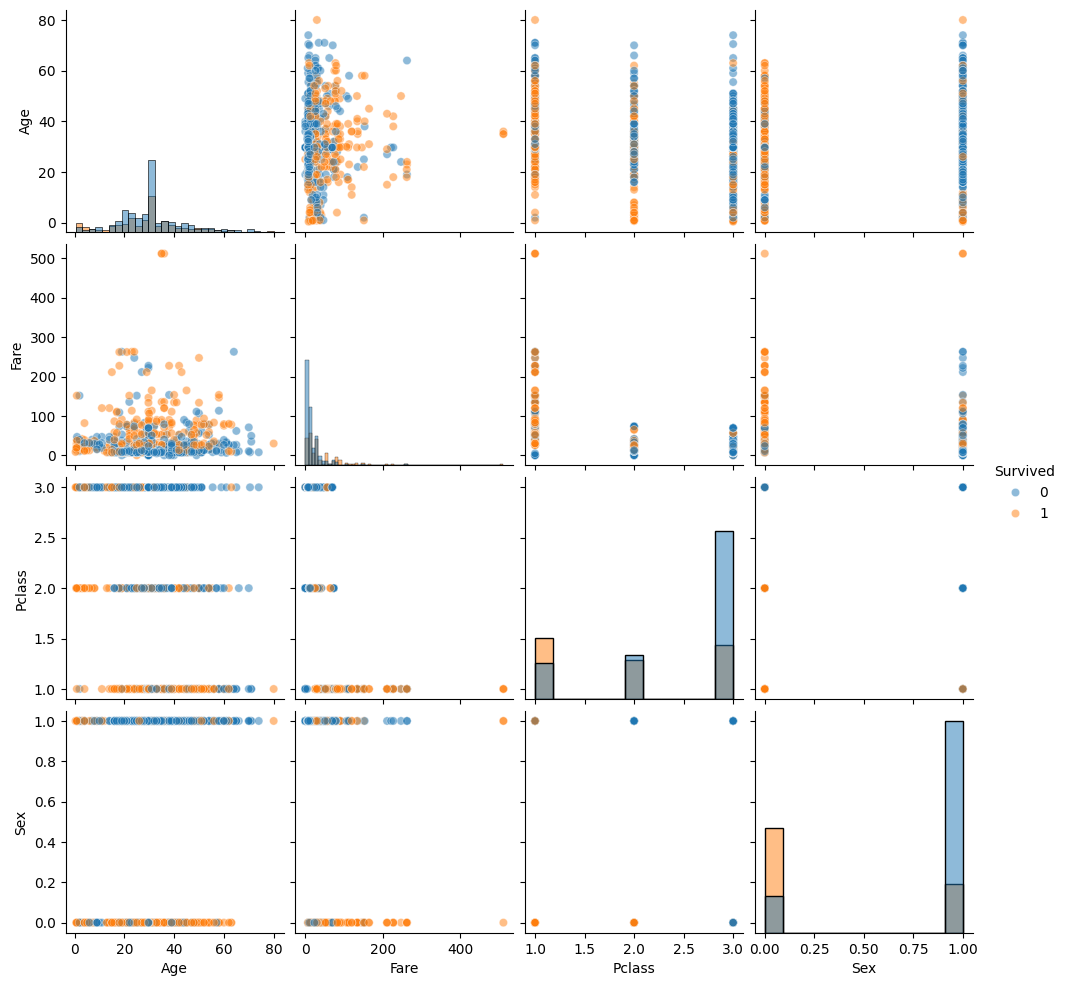

In [210]:
# Use this cell for your code

import seaborn as sns
subset_cols = ["Age", "Fare", "Pclass", "Sex", "Survived"]
sns.pairplot(df[subset_cols], hue="Survived", diag_kind="hist", plot_kws={"alpha":0.5})

5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

*Use this (markdown) cell for your written answer*

I filled in missing values with the mean or most common value so I didn’t have to throw away any passengers. This keeps the dataset complete but it can make things a bit less varied and makes the most common values appear more often than they really are.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [211]:
# Use this cell for your code

from collections import Counter
import re

with open(r"C:\Users\Omistaja\Downloads\pos.txt", "r", encoding="utf-8") as f:
    positive_texts = f.readlines()

with open(r"C:\Users\Omistaja\Downloads\neg.txt", "r", encoding="utf-8") as f:
    negative_texts = f.readlines()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

def most_common_words(texts, top_n=20):
    words = []
    for text in texts:
        clean_text = preprocess_text(text)
        words.extend(clean_text.split())
    counter = Counter(words)
    return counter.most_common(top_n)

top_pos = most_common_words(positive_texts)
top_neg = most_common_words(negative_texts)
print("Top words in positive texts:", top_pos)
print("Top words in negative texts:", top_neg)

Top words in positive texts: [('great', 435943), ('work', 427790), ('use', 345250), ('good', 291461), ('fit', 273537), ('instal', 229416), ('product', 210098), ('look', 181414), ('just', 180428), ('like', 175727), ('easi', 162868), ('light', 147339), ('car', 147224), ('price', 144915), ('need', 136525), ('perfect', 124435), ('time', 123980), ('replac', 122262), ('qualiti', 119733), ('nice', 119319)]
Top words in negative texts: [('work', 39998), ('use', 37248), ('fit', 31299), ('product', 24395), ('just', 23582), ('light', 22916), ('like', 20686), ('time', 19673), ('look', 18824), ('instal', 18709), ('did', 18448), ('good', 17296), ('dont', 17139), ('buy', 16889), ('car', 16702), ('return', 15227), ('tri', 14958), ('doe', 14202), ('replac', 13510), ('didnt', 13047)]


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [212]:
# Use this cell for your code

from sklearn.feature_extraction.text import TfidfVectorizer

with open(r"C:\Users\Omistaja\Downloads\pos.txt", "r", encoding="utf-8") as f:
    positive_texts = f.read().splitlines()

with open(r"C:\Users\Omistaja\Downloads\neg.txt", "r", encoding="utf-8") as f:
    negative_texts = f.read().splitlines()

documents = [' '.join(positive_texts), ' '.join(negative_texts)]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)
print("Feature names (first 20):", vectorizer.get_feature_names_out()[:20])
print("TF-IDF matrix (dense, first 5 features):")
print(tfidf_matrix.todense()[:, :5])

Shape of TF-IDF matrix: (2, 235325)
Feature names (first 20): ['00' '000' '0000' '00000' '000000' '00000000' '000000000000000000058'
 '000000000000002' '00000000004' '0000001' '00000042' '000001' '00001'
 '00004' '00005' '00005anbspand' '00006' '0000833333' '0000ga' '0001']
TF-IDF matrix (dense, first 5 features):
[[3.71913607e-04 7.15218475e-05 4.54374090e-05 2.52430050e-06
  1.68286700e-06]
 [2.18816402e-04 1.73544043e-04 6.03631453e-05 7.54539316e-06
  7.54539316e-06]]


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [213]:
# Use this cell for your code

from sklearn.feature_extraction.text import TfidfVectorizer

with open(r"C:\Users\Omistaja\Downloads\pos.txt", "r", encoding="utf-8") as f:
    positive_texts = f.read().splitlines()

with open(r"C:\Users\Omistaja\Downloads\neg.txt", "r", encoding="utf-8") as f:
    negative_texts = f.read().splitlines()

documents = [' '.join(positive_texts), ' '.join(negative_texts)]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
tfidf_dense = tfidf_matrix.todense()
top_n = 20
top_pos_indices = np.argsort(tfidf_dense[0,:].A1)[-top_n:][::-1]
top_neg_indices = np.argsort(tfidf_dense[1,:].A1)[-top_n:][::-1]
top_pos_words = [(feature_names[i], tfidf_dense[0,i]) for i in top_pos_indices]
top_neg_words = [(feature_names[i], tfidf_dense[1,i]) for i in top_neg_indices]

print("Top 20 TF-IDF words in positive reviews:")
for word, score in top_pos_words:
    print(word, round(score, 4))

print("\nTop 20 TF-IDF words in negative reviews:")
for word, score in top_neg_words:
    print(word, round(score, 4))

Top 20 TF-IDF words in positive reviews:
great 0.3668
work 0.3599
use 0.2905
good 0.2452
fit 0.2301
instal 0.193
product 0.1768
look 0.1526
just 0.1518
like 0.1479
easi 0.137
light 0.124
car 0.1239
price 0.1219
need 0.1149
perfect 0.1047
time 0.1043
replac 0.1029
qualiti 0.1007
nice 0.1004

Top 20 TF-IDF words in negative reviews:
work 0.3018
use 0.281
fit 0.2361
product 0.1841
just 0.1779
light 0.1728
like 0.1561
time 0.1484
look 0.142
instal 0.1412
did 0.1392
good 0.1305
dont 0.1293
buy 0.1274
car 0.126
return 0.1149
tri 0.1129
doe 0.1072
replac 0.1019
didnt 0.0984


4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

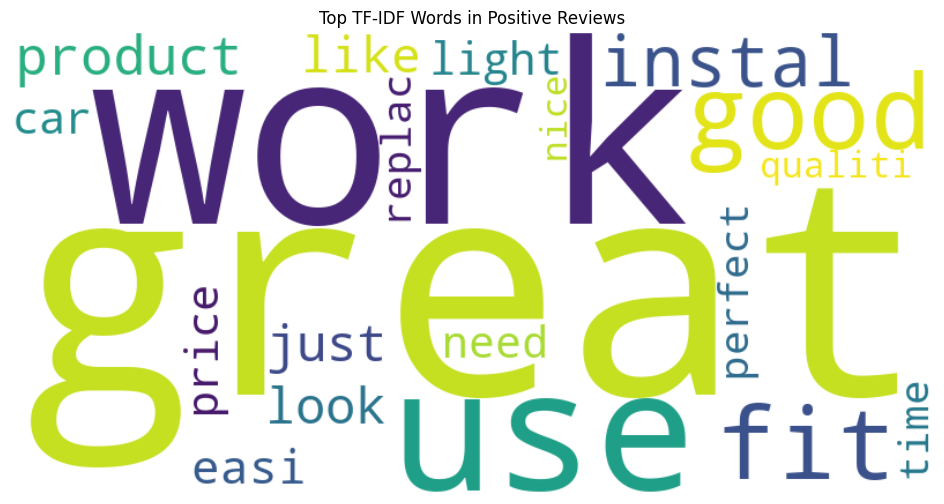

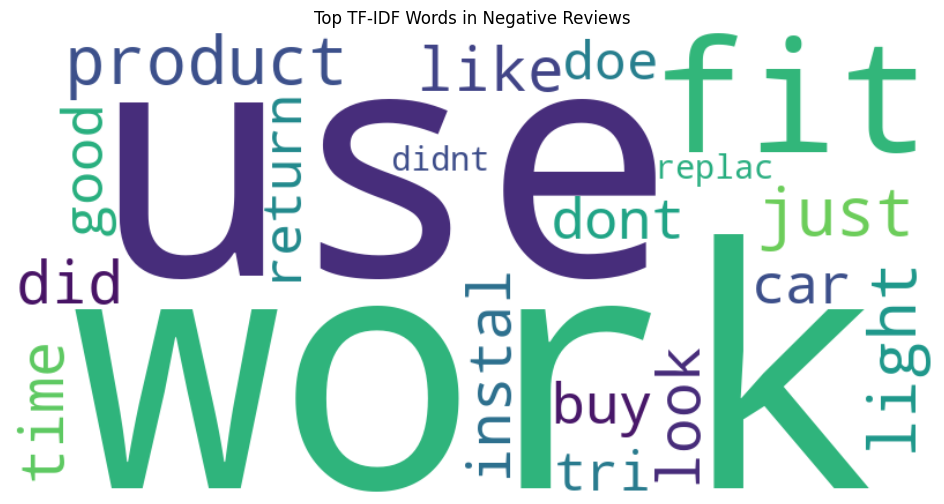

In [219]:
# Use this cell for your code

from wordcloud import WordCloud
import matplotlib.pyplot as plt

top_pos_dict = {word: score for word, score in top_pos_words}
top_neg_dict = {word: score for word, score in top_neg_words}
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_pos_dict)
wordcloud_neg = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_neg_dict)

# Plot positive word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Top TF-IDF Words in Positive Reviews")
wordcloud_pos.to_file("wordcloud_positive.png")
plt.show()

# Plot negative word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Top TF-IDF Words in Negative Reviews")
wordcloud_neg.to_file("wordcloud_negative.png")
plt.show()

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



**Submit a PDF with all the charts (the ones you found and the ones you produced).**

In [226]:
# I'm using my old data science work, where I had no experience with building clear graphs and visualizations and therefore I built junk charts.
df = pd.read_csv(r'C:\Users\Omistaja\Downloads\dataset_for_datascience_assignment.csv')
df.head()
#I've also previously saved the junk charts from Data_science_junk.ipynb and now I'm displaying them below

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


Displaying saved junk charts:


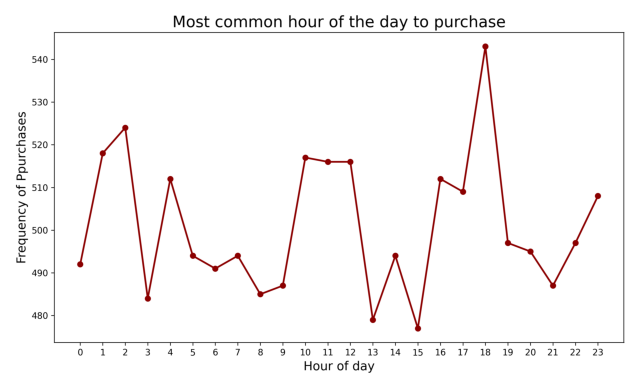

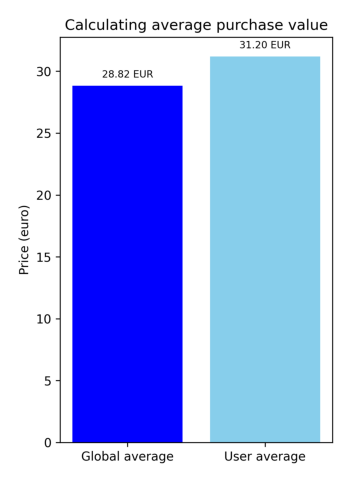

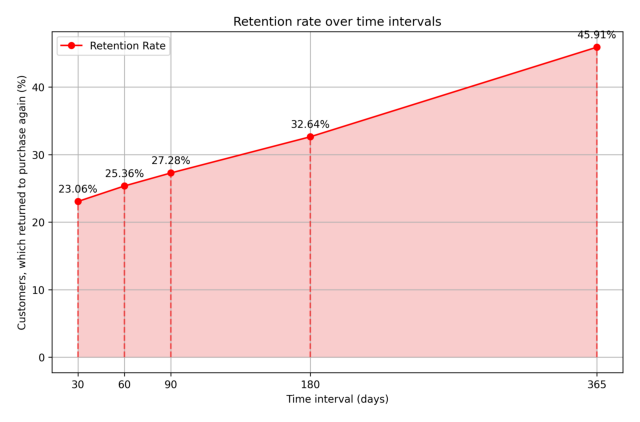

In [244]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

png_files = ["Junk_chart_1.png", "Junk_chart_2.png", "Junk_chart_3.png"]
print("Displaying saved junk charts:")
for f in png_files:
    img = mpimg.imread(f)
    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

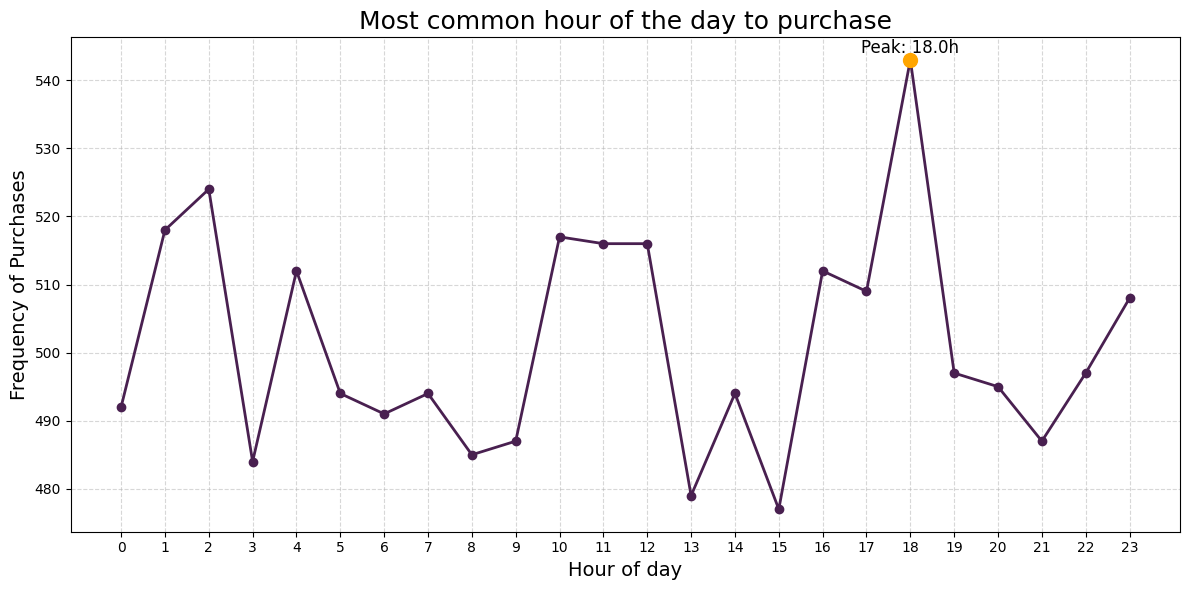

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv("dataset_for_datascience_assignment.csv")
purchase_count_per_hour = df['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].value_counts().sort_index()

colors = [
    "#492050", "#90529C", "#C490CF", "#E4CAE9", "#F1F1F1", "#BCDABC", "#72B173", 
    "#2C792D", "#023903"
]
cmap = LinearSegmentedColormap.from_list("purple_green", colors)

plt.figure(figsize=(12,6))
purchase_count_per_hour.plot(kind='line', color=cmap(np.linspace(0, 1, len(purchase_count_per_hour))), marker='o', lw=2)

plt.title("Most common hour of the day to purchase", fontsize=18)
plt.xlabel("Hour of day", fontsize=14)
plt.ylabel("Frequency of Purchases", fontsize=14)
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)

peak_hour = purchase_count_per_hour.idxmax()
plt.scatter(peak_hour, purchase_count_per_hour.max(), color='orange', s=100, zorder=5)
plt.text(peak_hour, purchase_count_per_hour.max()+1, f'Peak: {peak_hour}h', ha='center', fontsize=12)

plt.tight_layout()
plt.savefig("Improved_chart_1.png", dpi=300, bbox_inches="tight")
plt.show()

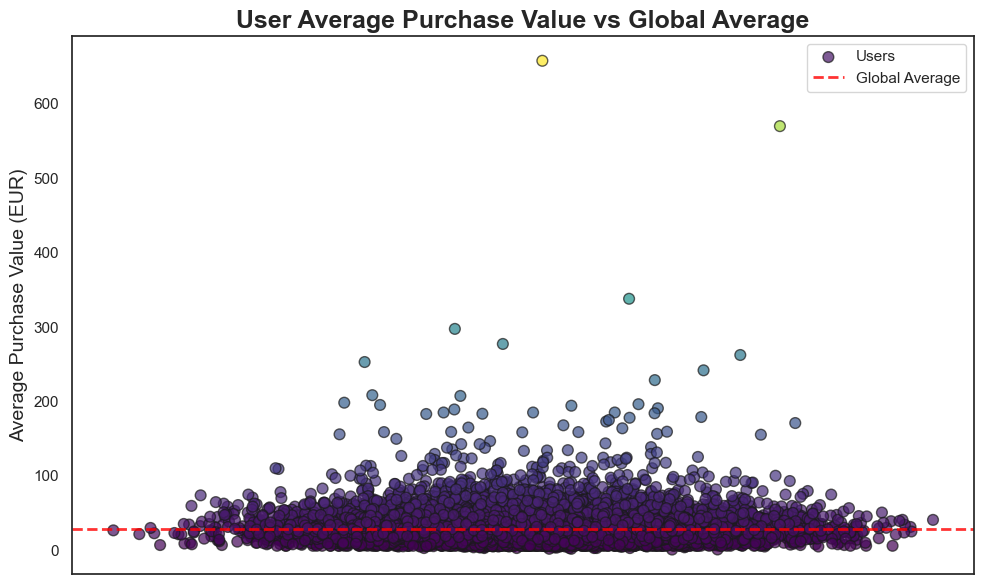

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("dataset_for_datascience_assignment.csv")
global_avg = df['TOTAL_PURCHASES_EUR'].sum() / df['PURCHASE_COUNT'].sum()
user_avg_purchase_value = df[df['PURCHASE_COUNT'] > 0].groupby('USER_ID').agg(
    total_purchase_value=('TOTAL_PURCHASES_EUR', 'sum'),
    total_purchase_count=('PURCHASE_COUNT', 'sum')
)
user_avg_purchase_value['user_avg'] = user_avg_purchase_value['total_purchase_value'] / user_avg_purchase_value['total_purchase_count']
sns.set(style="white")
plt.figure(figsize=(10,6))
x_user = np.random.normal(0, 0.05, size=len(user_avg_purchase_value))
plt.scatter(x_user, user_avg_purchase_value['user_avg'], 
            c=user_avg_purchase_value['user_avg'], cmap='viridis', 
            s=60, alpha=0.7, edgecolor='k', label='Users')

plt.axhline(global_avg, color='red', linestyle='--', alpha=0.8, linewidth=2, label='Global Average')
plt.xticks([])
plt.ylabel('Average Purchase Value (EUR)', fontsize=14)
plt.title('User Average Purchase Value vs Global Average', fontsize=18, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig("Improved_chart_2.png", dpi=300, bbox_inches="tight")
plt.show()

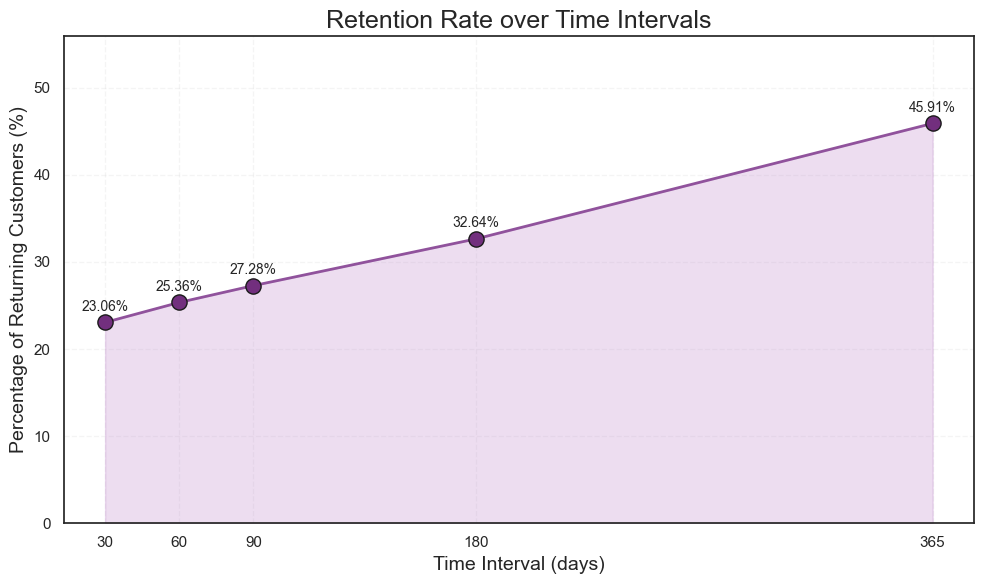

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv("dataset_for_datascience_assignment.csv")
df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])
df['DAYS_BETWEEN_PURCHASES'] = (df['LAST_PURCHASE_DAY'] - df['FIRST_PURCHASE_DAY']).dt.days
time_intervals = [30, 60, 90, 180, 365]
retention_rates = [(df[df['DAYS_BETWEEN_PURCHASES'] <= i].shape[0] / df.shape[0]) * 100 for i in time_intervals]
line_color = "#90529C" 
fill_color = "#C490CF"
point_color = "#722F7E" 

plt.figure(figsize=(10,6))
plt.plot(time_intervals, retention_rates, marker='o', color=line_color, lw=2, label='Retention Rate')
plt.fill_between(time_intervals, retention_rates, color=fill_color, alpha=0.3)
plt.scatter(time_intervals, retention_rates, color=point_color, s=120, edgecolor='k', zorder=5)

for x, y in zip(time_intervals, retention_rates):
    plt.text(x, y+1, f'{y:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='medium')

plt.title('Retention Rate over Time Intervals', fontsize=18)
plt.xlabel('Time Interval (days)', fontsize=14)
plt.ylabel('Percentage of Returning Customers (%)', fontsize=14)
plt.xticks(time_intervals)
plt.ylim(0, max(retention_rates)+10)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.savefig("Improved_chart_3.png", dpi=300, bbox_inches="tight")
plt.show()

In [309]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

pdf = PdfPages("all_plots.pdf")

for f in ["Junk_chart_1.png", "Junk_chart_2.png", "Junk_chart_3.png", "Improved_chart_1.png", "Improved_chart_2.png", "Improved_chart_3.png"]:
    img = plt.imread(f)
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.axis("off")
    pdf.savefig(fig)
    plt.close(fig)

pdf.close()

Displaying saved improved charts:


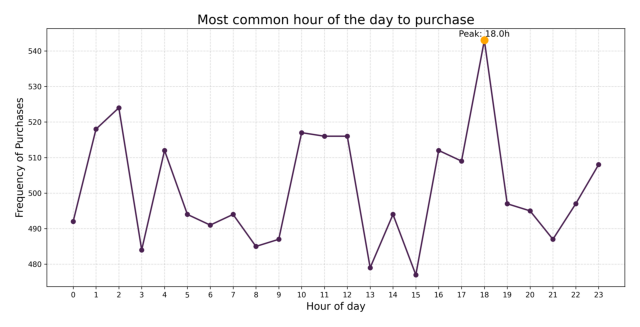

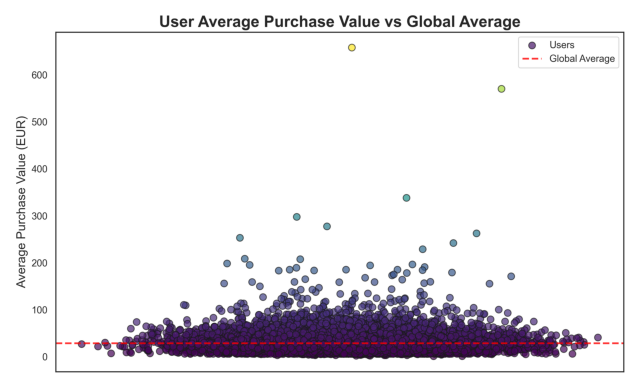

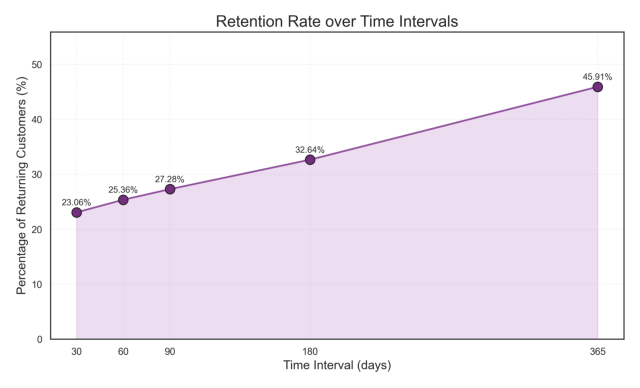

In [310]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

png_files = ["Improved_chart_1.png", "Improved_chart_2.png", "Improved_chart_3.png"]
print("Displaying saved improved charts:")
for f in png_files:
    img = mpimg.imread(f)
    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Summarization: I've improved 3 junk charts, which I've selected from my previous older data science work and I've attached all files.